In [1]:
import numpy as np
import matplotlib.pyplot as plt
import folium
import ipyleaflet
from base64 import b64encode

vmin = 0
vmax = 2000

import matplotlib
cmap = matplotlib.cm.get_cmap("viridis")

# testing - not used here
import branca.colormap as cm
bcmap = cm.linear.viridis.scale(vmin=vmin, vmax=vmax).to_step(n=4)
bcmap.caption = 'my color scale'
bcmap


# Create data

[[1000. 1000. 1000. ... 2000. 2000. 2000.]
 [1000. 1000. 1000. ...    0.    0. 2000.]
 [1000. 1000. 1000. ...    0.    0. 2000.]
 ...
 [2000.    0.    0. ...    0.    0. 2000.]
 [2000.    0.    0. ...    0.    0. 2000.]
 [2000. 2000. 2000. ... 2000. 2000. 2000.]]


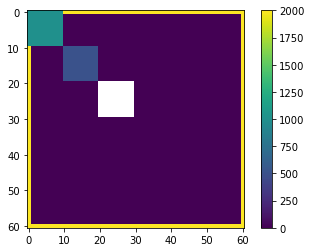

In [2]:
data = np.zeros((61, 61))
data[0, :] = vmax
data[60, :] = vmax
data[:, 0] = vmax
data[:, 60] = vmax
data[:10,:10] = vmax/2
data[10:20,10:20] = vmax/4
data[20:30,20:30] = np.nan

print(data)

plt.imshow(data, cmap=cmap)
plt.colorbar()

## plot png

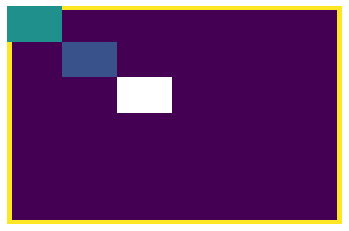

In [3]:
plt.imshow(data, cmap=cmap, aspect='auto', vmin=0, vmax=2000)
plt.axis('off')
plt.savefig('temp.png', transparent=True, bbox_inches='tight', dpi=500)

## read png as base64

In [4]:
from base64 import b64encode

with open('temp.png', "rb") as f:
    data1 = b64encode(f.read())
    data1 = data1.decode("ascii")
    imgurl = "data:image/png;base64," + data1

In [14]:
# bounds = [[0, -60], [60, 60]]
bounds = [[-60, 120], [0, 180]]
center = [0,0]

# Plot raw data


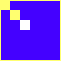

In [18]:
m = folium.Map(center, zoom_start=2)


grid_lats = range(-90, 91, 10)
grid_lons = range(-189, 181, 10)
for lat in grid_lats:
     folium.PolyLine([[lat, -180],[lat, 180]], weight=0.5).add_to(m)
for lon in grid_lons:
    folium.PolyLine([[-90, lon],[90, lon]], weight=0.5).add_to(m)


folium.raster_layers.ImageOverlay(
    image=data,
    bounds=bounds,
    colormap=cmap,
    opacity=0.6,
).add_to(m)

# maybe we could do a colormap based on ColorLine
# folium.ColorLine(positions=[[70,-60],[70,0], [70,60]], colors=[0,1], colormap=['r','g'], weigth=10).add_to(m)

m

In [7]:

m = ipyleaflet.Map(center=center, zoom=2)

img = ipyleaflet.ImageOverlay(
    url=data,
    bounds=bounds,  
    colormap=cmap,
)
m.add_layer(img)

m

TraitError: The 'url' trait of an ImageOverlay instance expected a unicode string, not the ndarray array([[1000., 1000., 1000., ..., 2000., 2000., 2000.],
       [1000., 1000., 1000., ...,    0.,    0., 2000.],
       [1000., 1000., 1000., ...,    0.,    0., 2000.],
       ...,
       [2000.,    0.,    0., ...,    0.,    0., 2000.],
       [2000.,    0.,    0., ...,    0.,    0., 2000.],
       [2000., 2000., 2000., ..., 2000., 2000., 2000.]]).

# Plot png base64


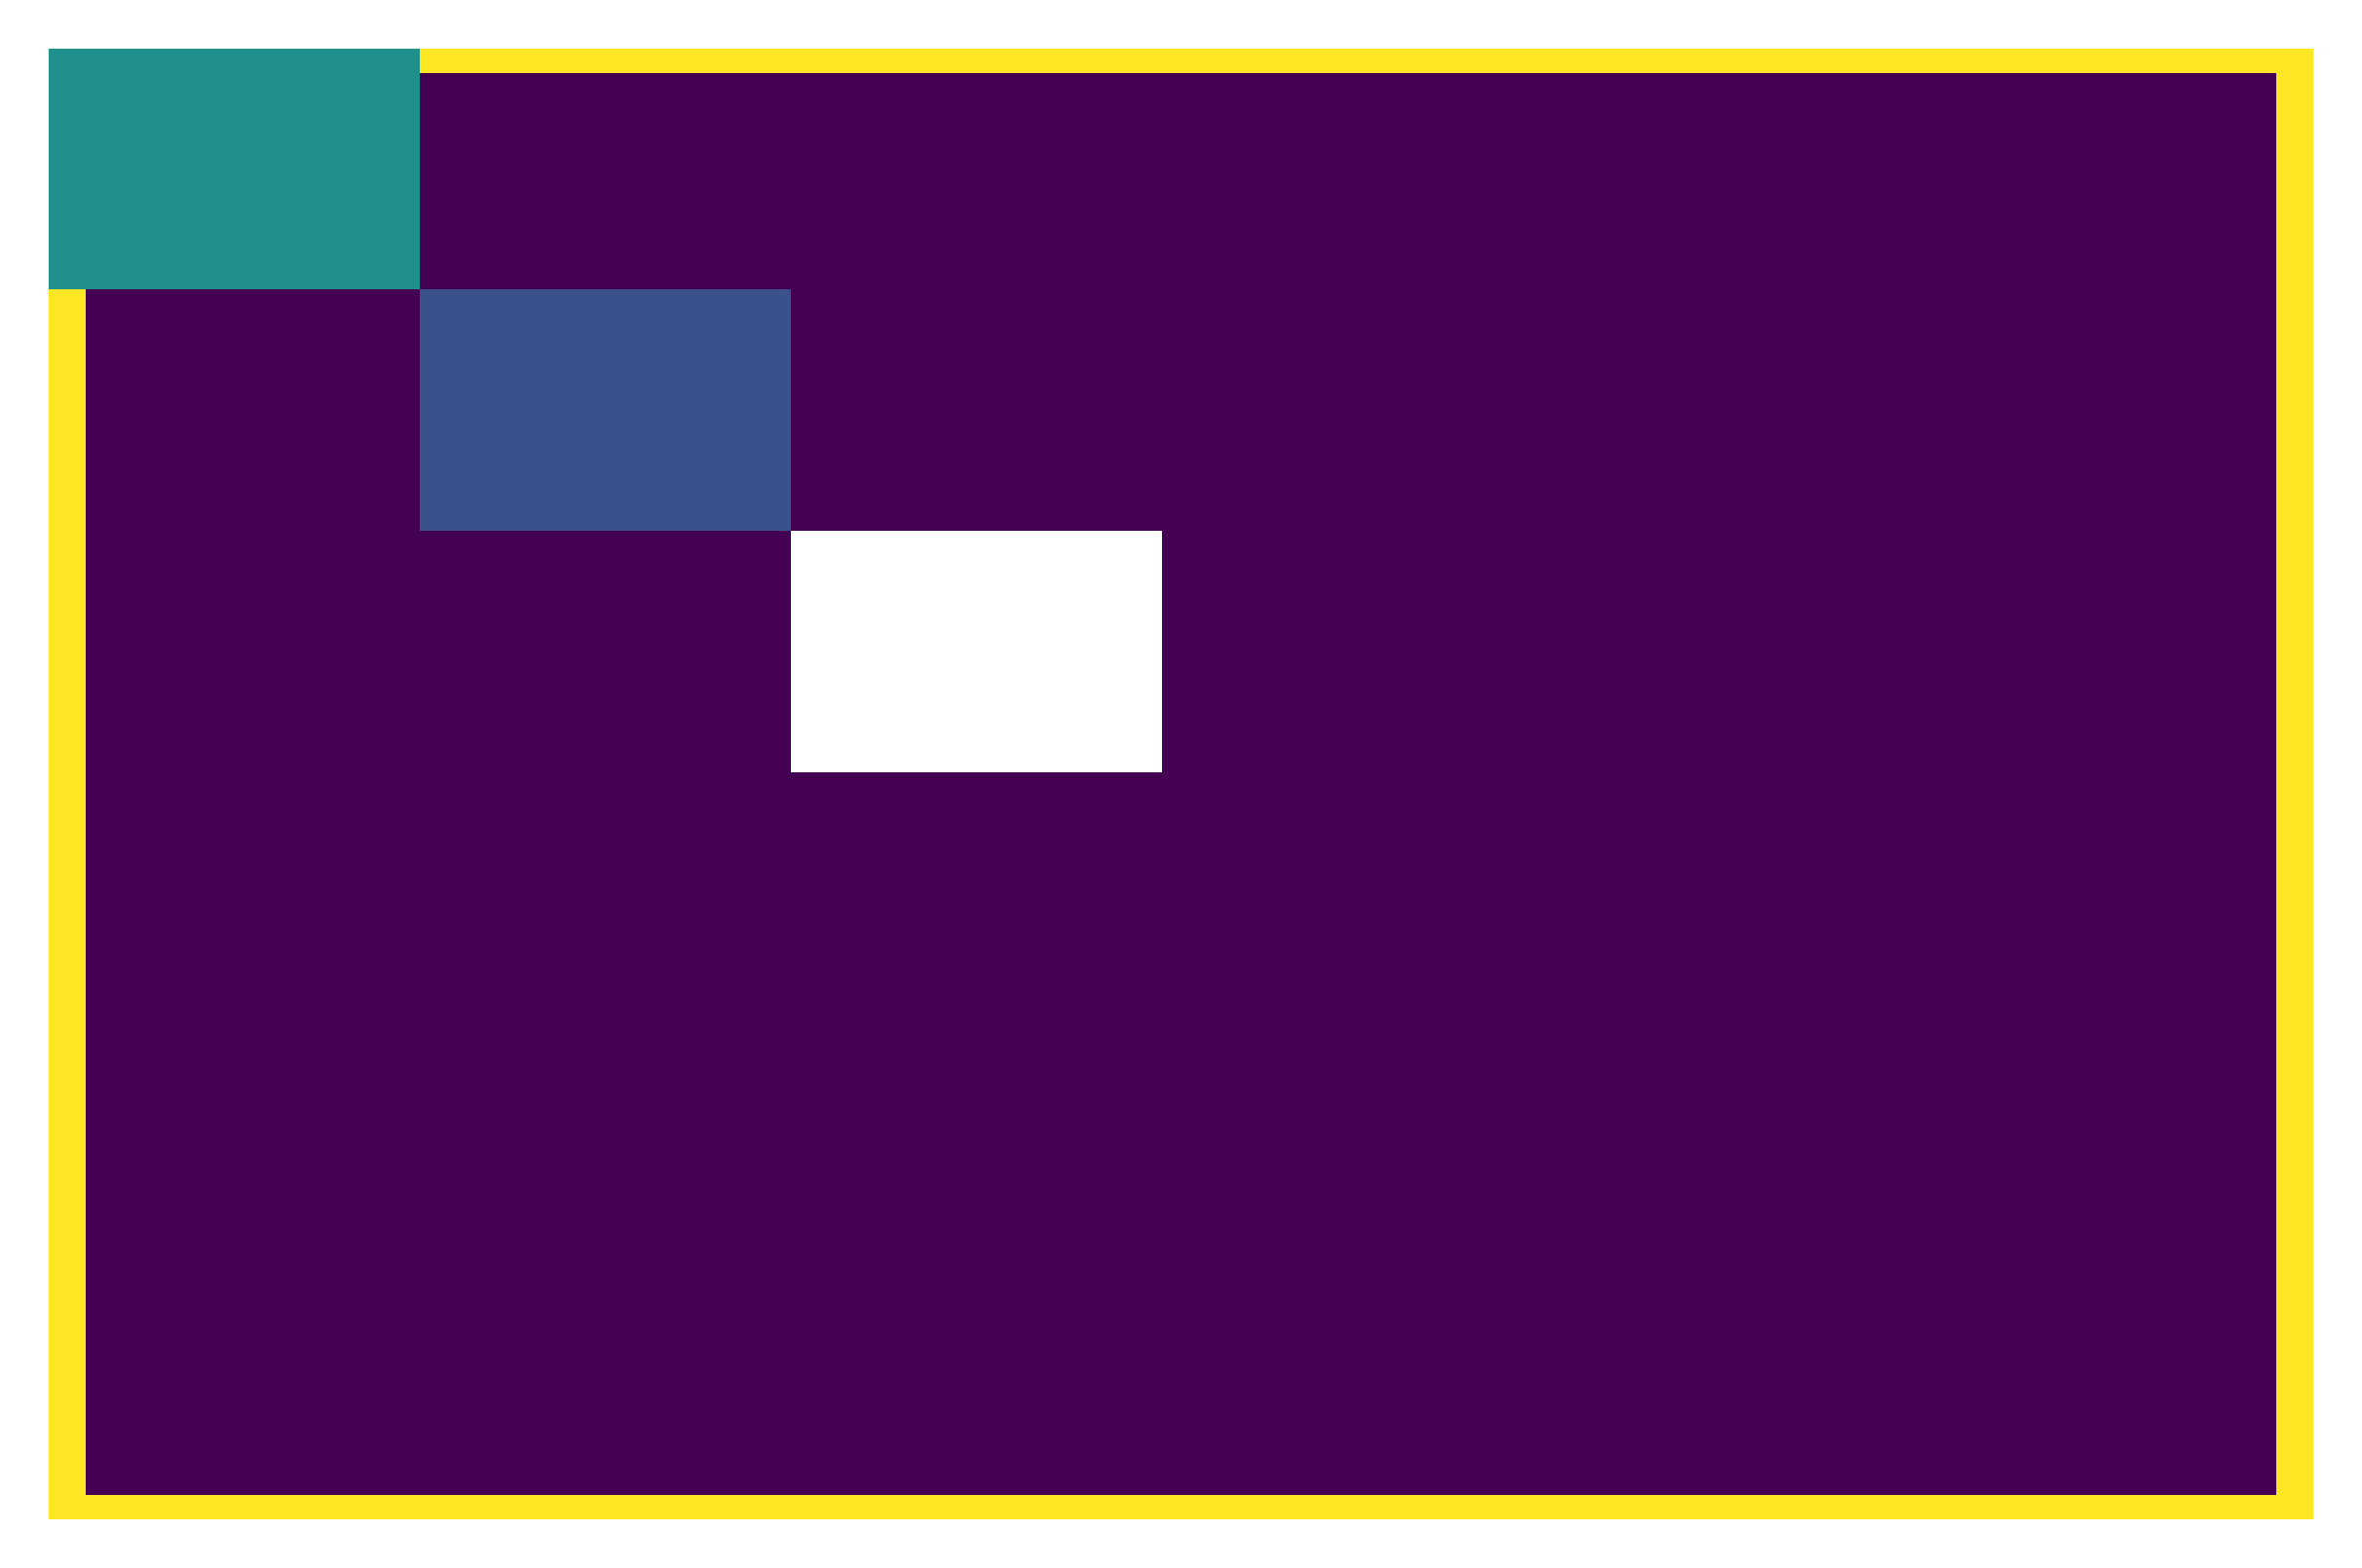

In [19]:

m = folium.Map(center, zoom_start=2)

grid_lats = range(-90, 91, 10)
grid_lons = range(-189, 181, 10)
for lat in grid_lats:
     folium.PolyLine([[lat, -180],[lat, 180]], weight=0.5).add_to(m)
for lon in grid_lons:
    folium.PolyLine([[-90, lon],[90, lon]], weight=0.5).add_to(m)

    
folium.raster_layers.ImageOverlay(
    image=imgurl,
    bounds=bounds,
    opacity=0.6,
).add_to(m)

# maybe we could do a colormap based on ColorLine
# folium.ColorLine(positions=[[70,-60],[70,0], [70,60]], colors=[0,1], colormap=['r','g'], weigth=10).add_to(m)

m

In [20]:
import ipyleaflet

m = ipyleaflet.Map(center=center, zoom=2)

img = ipyleaflet.ImageOverlay(
    url=imgurl,
    bounds=bounds,  
    opacity=0.6,
)
m.add_layer(img)
m

Map(center=[0, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text'…